# **Partnership Prediction of Players**
---

## **Importing libraries and setting up the data repository :**

In [12]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_deliveries = pd.read_csv('../csv_files/deliveries.csv')
pd.options.display.max_columns = None

The 'deliveries.csv' file has been included in the repository.

## **Exploratory Data Analysis (EDA)**

In [14]:
df_deliveries.shape

(17380, 22)

In [15]:
df_deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [17]:
df_deliveries.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In the dataset, the columns 'season', 'start_date', 'venue', 'batting_team', 'bowling_team', 'striker', 'non-striker', 'bowler', 'wicket_type' and 'player_dismissed' are categorical, meaning they represent different categories or labels. On the other hand, 'match_id', 'innings', 'ball', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'other_wicket_type' and 'other_player_dismissed' are numerical columns, containing quantitative information.

In [18]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs                 42 non-null   

In [19]:
df_deliveries.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,431.000000,42.0,26.000000,117.000000,1.0,0.0,0.0
mean,16.418815,1.453797,22.544108,0.895224,0.044649,1.225058,1.0,2.153846,1.239316,5.0,NaN,NaN
std,9.196759,0.497875,13.638454,1.392734,0.285378,0.864237,0.0,1.433661,0.738703,NaN,NaN,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
25%,8.000000,1.000000,10.600000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
50%,17.000000,1.000000,22.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
75%,24.000000,2.000000,33.500000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN
max,32.000000,2.000000,49.700000,6.000000,5.000000,5.000000,1.0,4.000000,4.000000,5.0,NaN,NaN


In [20]:
def print_unique_values(df_deliveries, categorical_columns):
  for col in categorical_columns:
      print(f'{col}: {df_deliveries[col].unique()}')

In [21]:
categorical_columns = [col for col in df_deliveries if df_deliveries[col].dtype == 'object']
print_unique_values(df_deliveries,categorical_columns)

season: ['2023/24']
start_date: ['2023-10-05' '2023-10-06' '2023-10-07' '2023-10-08' '2023-10-09'
 '2023-10-10' '2023-10-11' '2023-10-13' '2023-10-14' '2023-10-15'
 '2023-10-16' '2023-10-17' '2023-10-18' '2023-10-19' '2023-10-20'
 '2023-10-21' '2023-10-22' '2023-10-23' '2023-10-12' '2023-10-24'
 '2023-10-25' '2023-10-26' '2023-10-27' '2023-10-28' '2023-10-29'
 '2023-10-30' '2023-10-31' '2023-11-01']
venue: ['Narendra Modi Stadium, Ahmedabad'
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Arun Jaitley Stadium, Delhi' 'MA Chidambaram Stadium, Chepauk, Chennai'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Maharashtra Cricket Association Stadium, Pune'
 'M Chinnaswamy Stadium, Bengaluru' 'Wankhede Stadium, Mumbai'
 'Eden Gardens, Kolkata']
batting_team: ['England' 'New Zealand' 'Pakistan' 'Netherlands' 'Afghanistan'
 'Bangladesh' 'South Africa' 'Sri Lanka' 'Australia' 'India']
bowling_team:

Batting_team and bowling_team are permutations of teams participating in Worldcup 2023. 

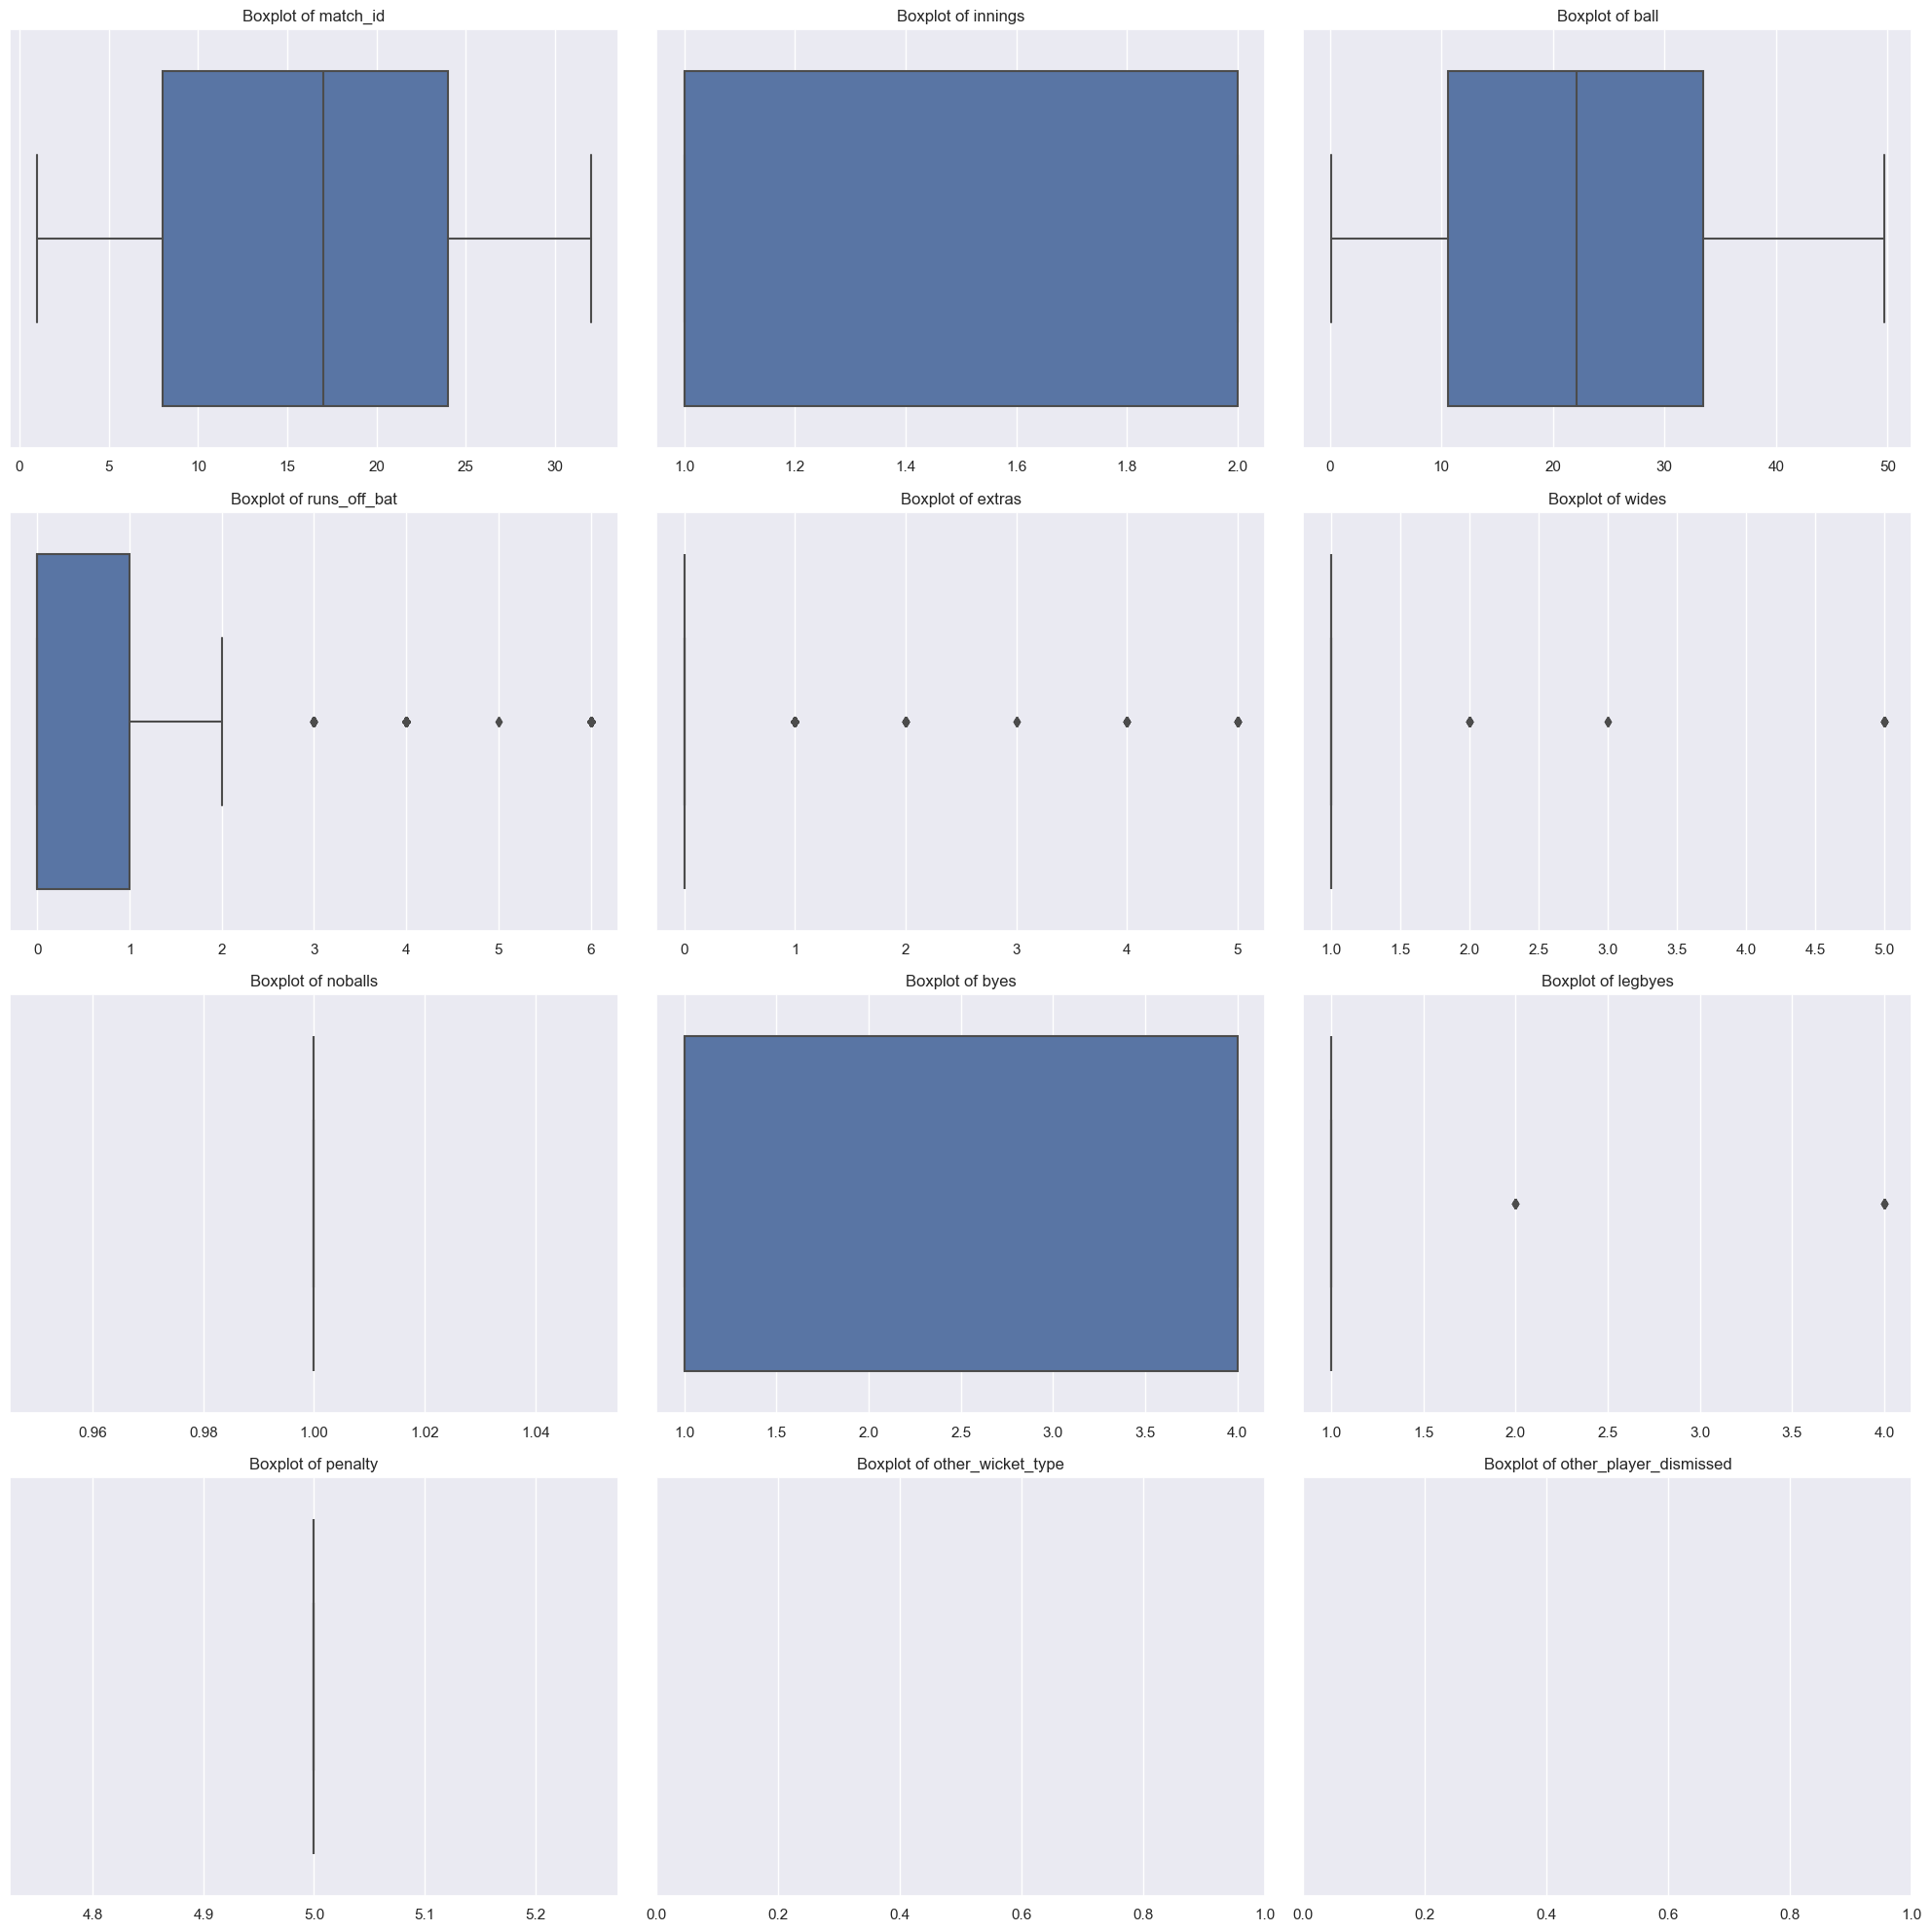

In [261]:
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(4, 3, figsize=(20, 20))

axes = axes.flatten()

numeric_columns = [col for col in df_deliveries if df_deliveries[col].dtype != 'object']

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df_deliveries[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [22]:
print('Outlier in percentage')

for col in numeric_columns:
    q1=df_deliveries[col].quantile(0.25)
    q3=df_deliveries[col].quantile(0.75)
    iqr=q3-q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    count=0
    for val in df_deliveries[col]:
        if val>upper or val<lower:
            count=count+1

    print(col +' : '+str(count/len(df_deliveries[col])*100)+' %')

Outlier in percentage
match_id : 0.0 %
innings : 0.0 %
ball : 0.0 %
runs_off_bat : 11.208285385500576 %
extras : 3.5500575373993093 %
wides : 0.1956271576524741 %
noballs : 0.0 %
byes : 0.0 %
legbyes : 0.0805523590333717 %
penalty : 0.0 %
other_wicket_type : 0.0 %
other_player_dismissed : 0.0 %


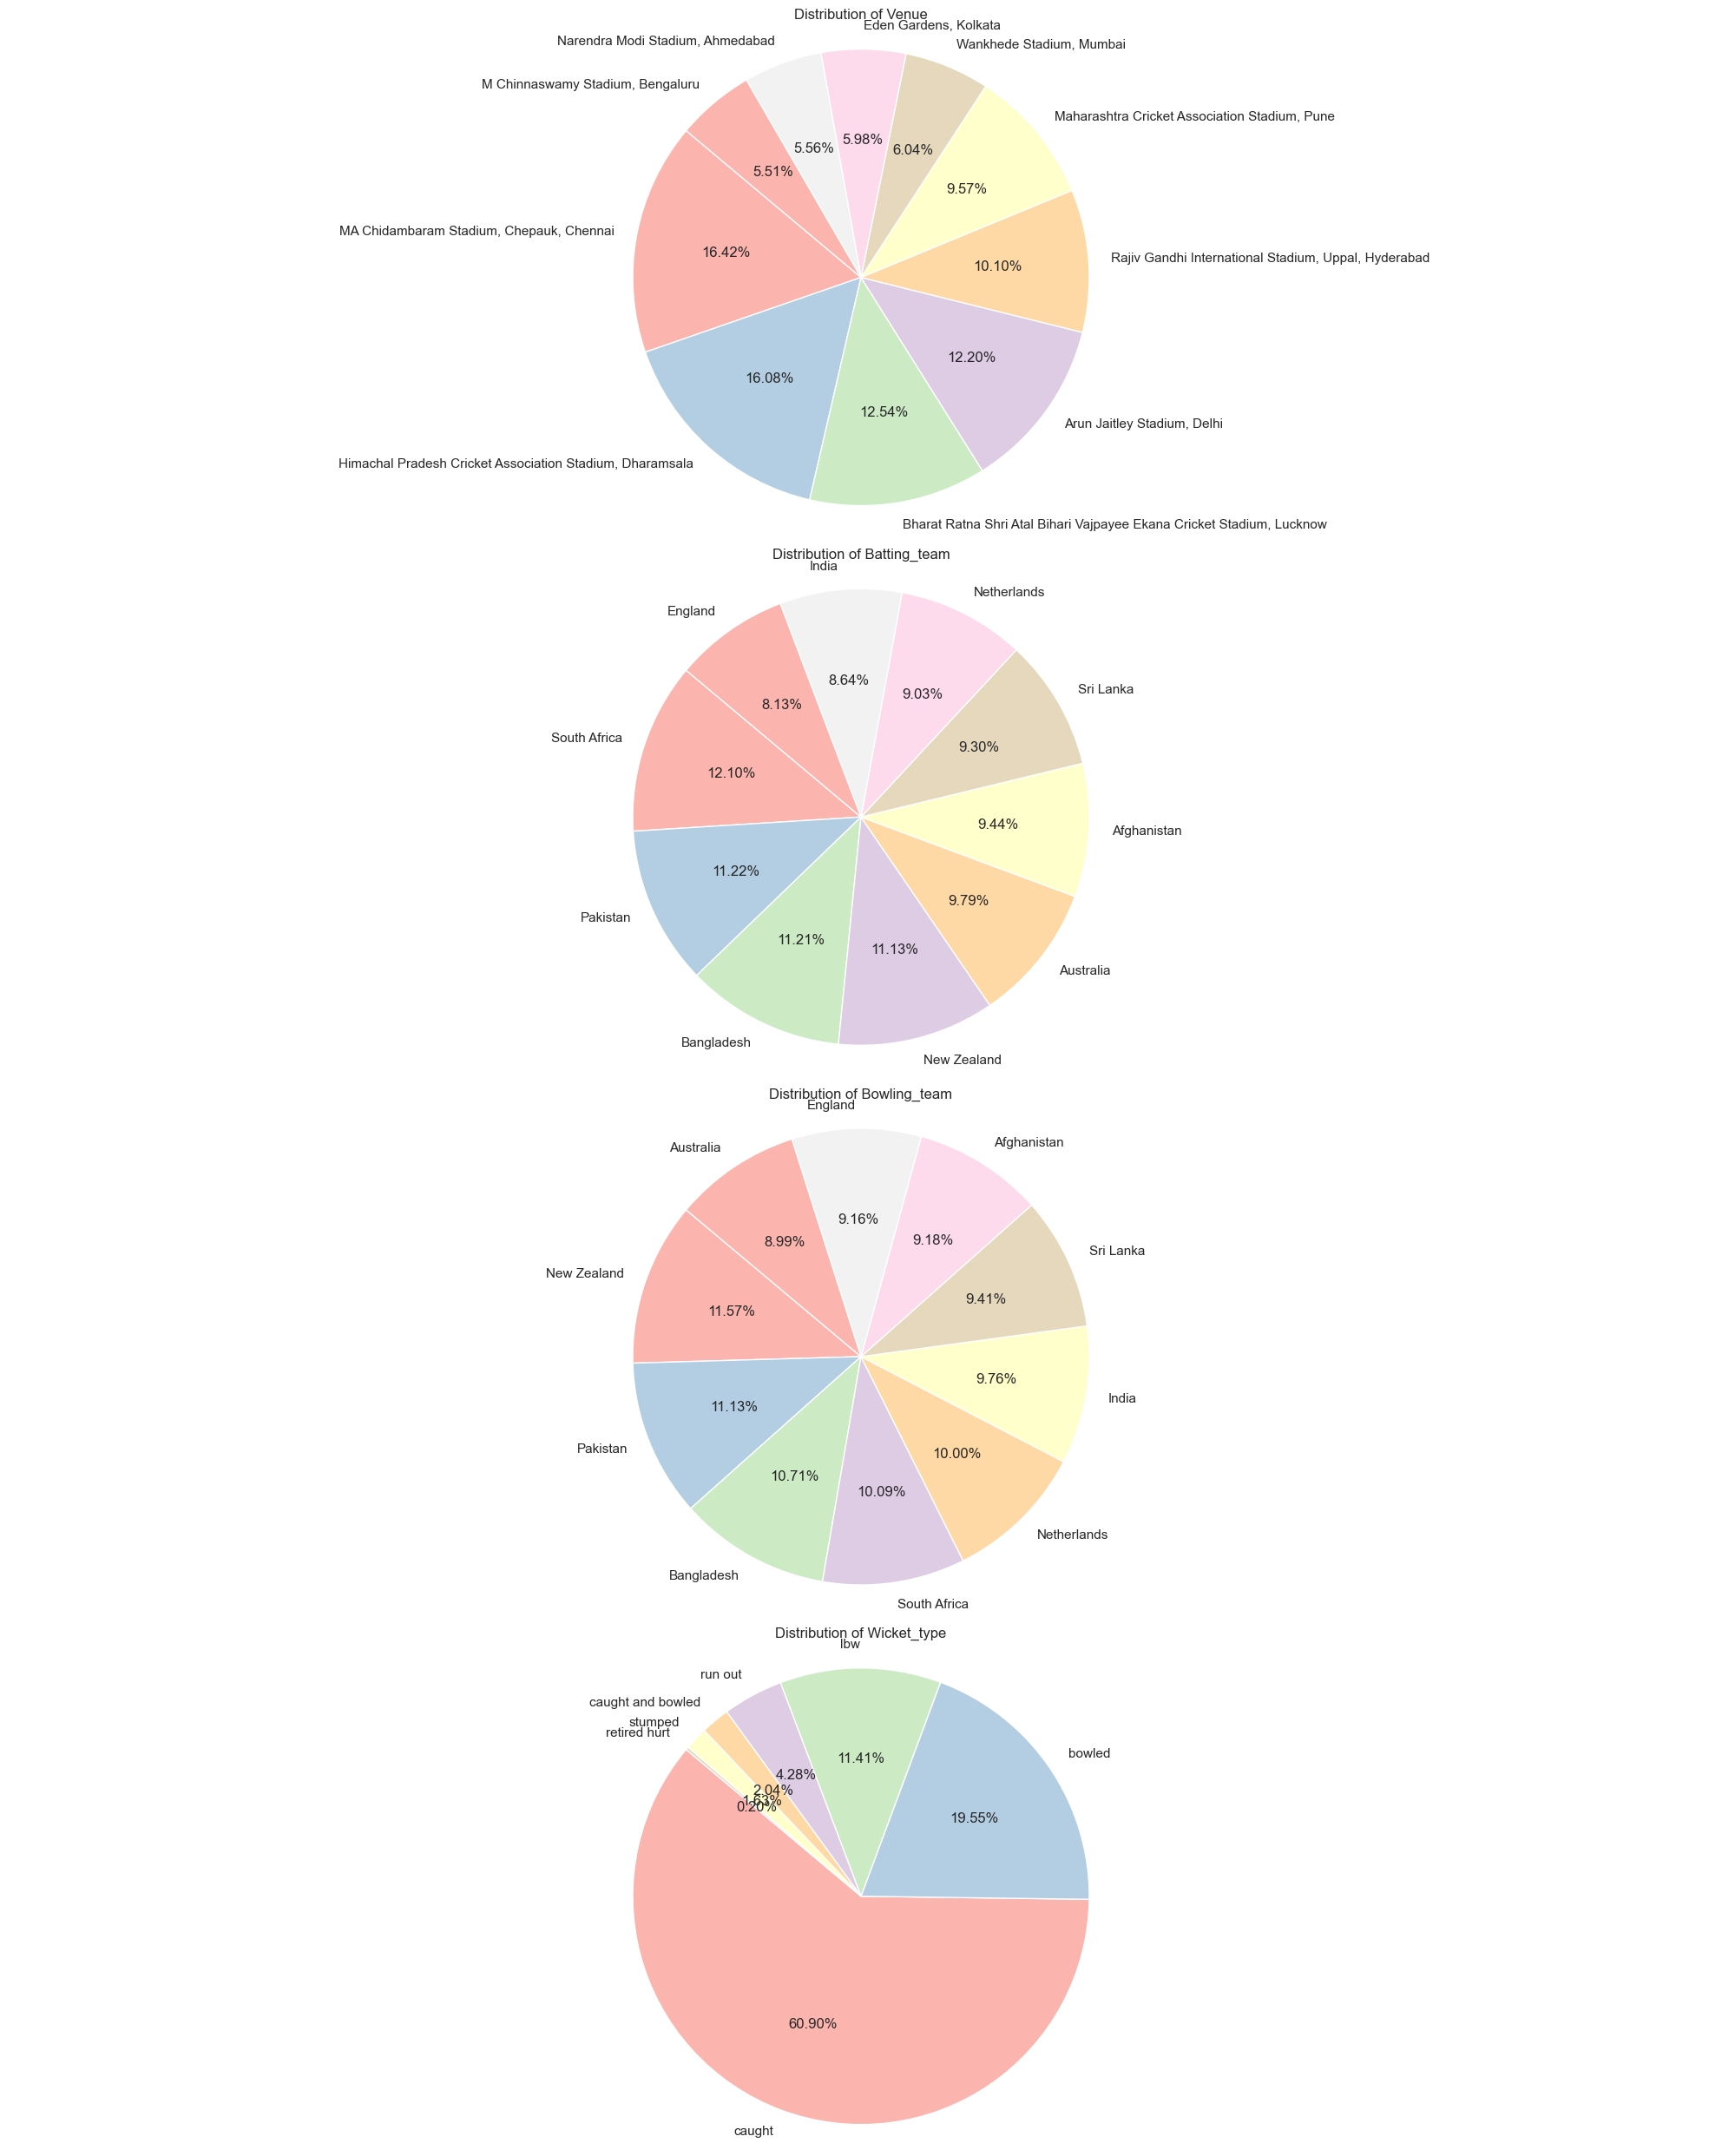

In [23]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(4, 1, figsize=(20, 25))

color_palette = sns.color_palette('Pastel1')

axes = axes.flatten()
categorical_columns = ['venue','batting_team','bowling_team','wicket_type']

for idx, feature in enumerate(categorical_columns):
    feature_counts = df_deliveries[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')

for i in range(len(categorical_columns), 2):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The pie chart shows that some stadiums have hosted more matches, while others have had fewer matches, and most of the players got out because of getting caught.

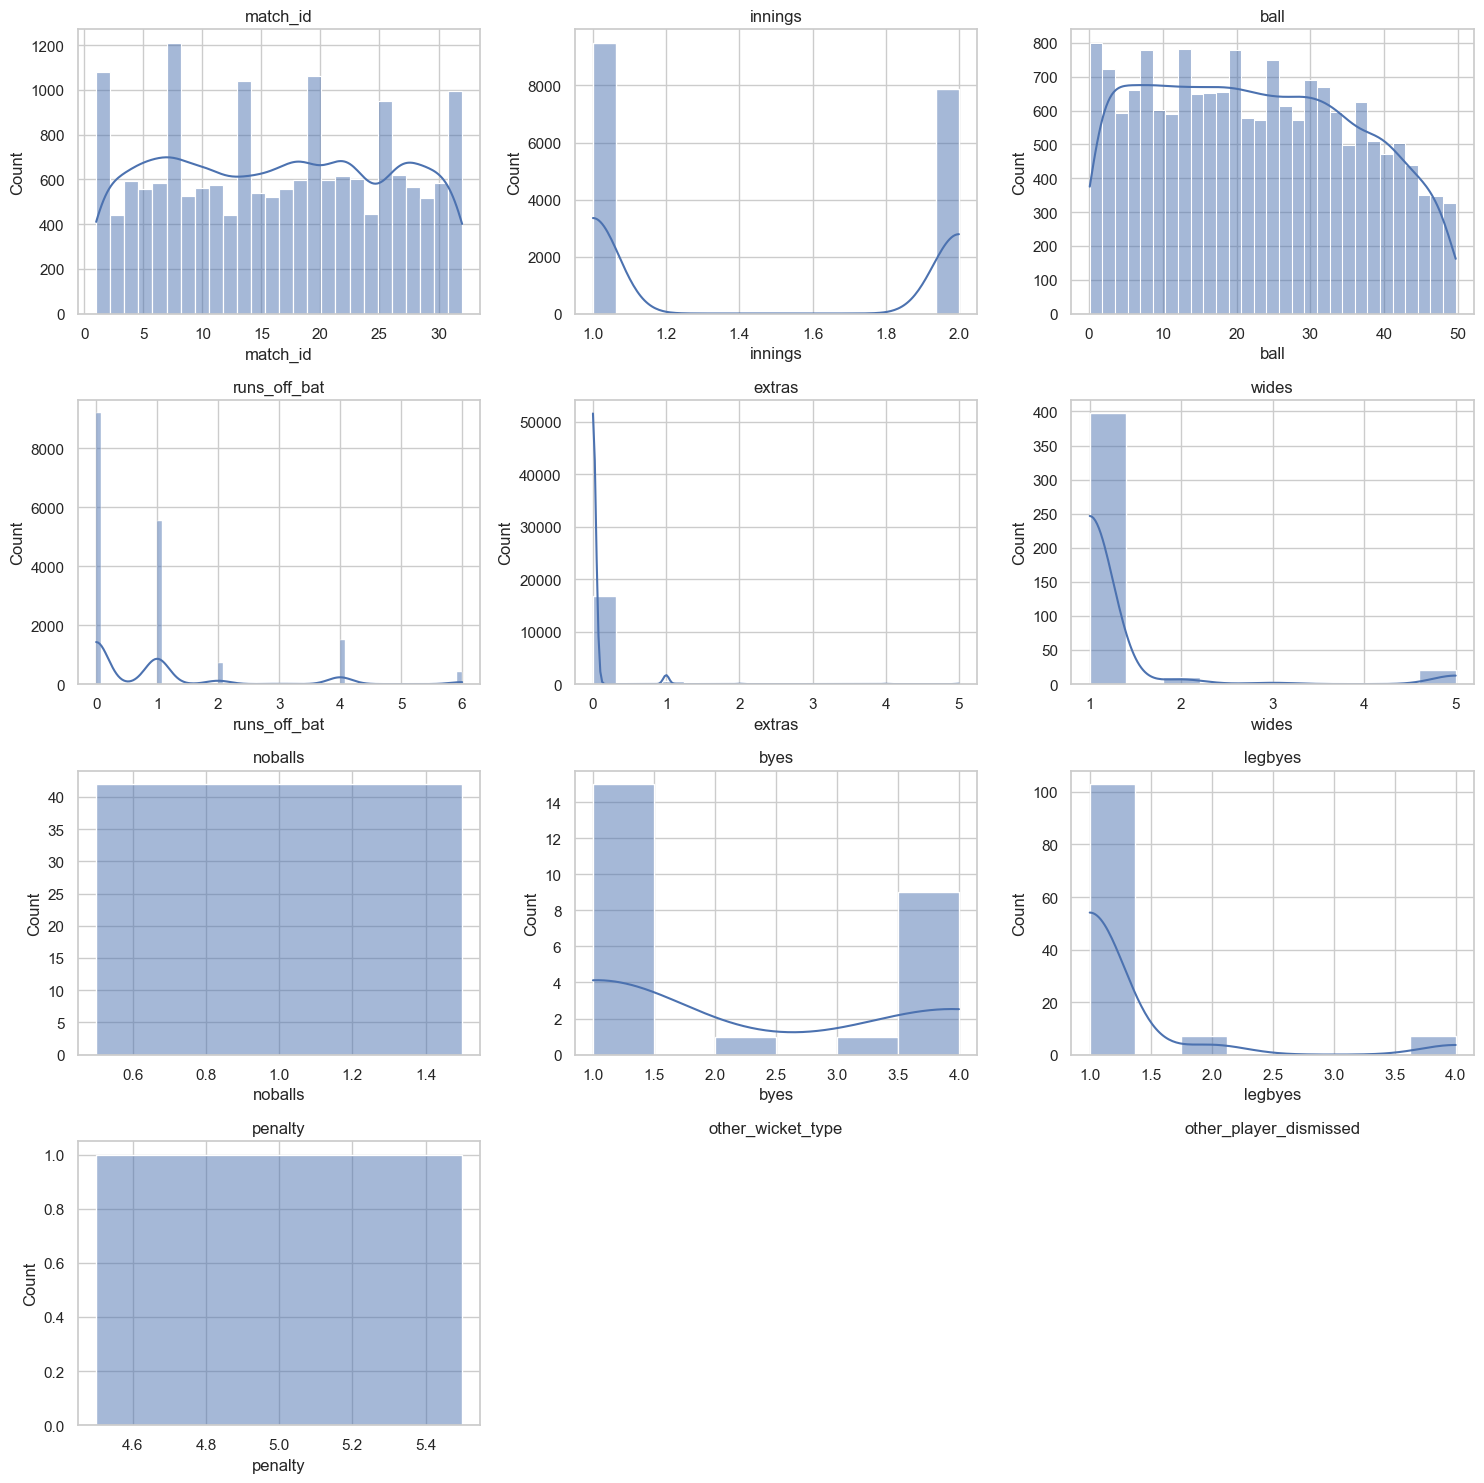

In [24]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax=ax.ravel()

for axid, col in enumerate(numeric_columns):
    sns.histplot(df_deliveries[col], ax=ax[axid],kde=True)
    ax[axid].set_title(col)


for axid in range(10, 12):
    ax[axid].axis('off')

plt.tight_layout()
plt.show()

This distribution shows the density of several numerical columns. It shows that most of them are skewed.

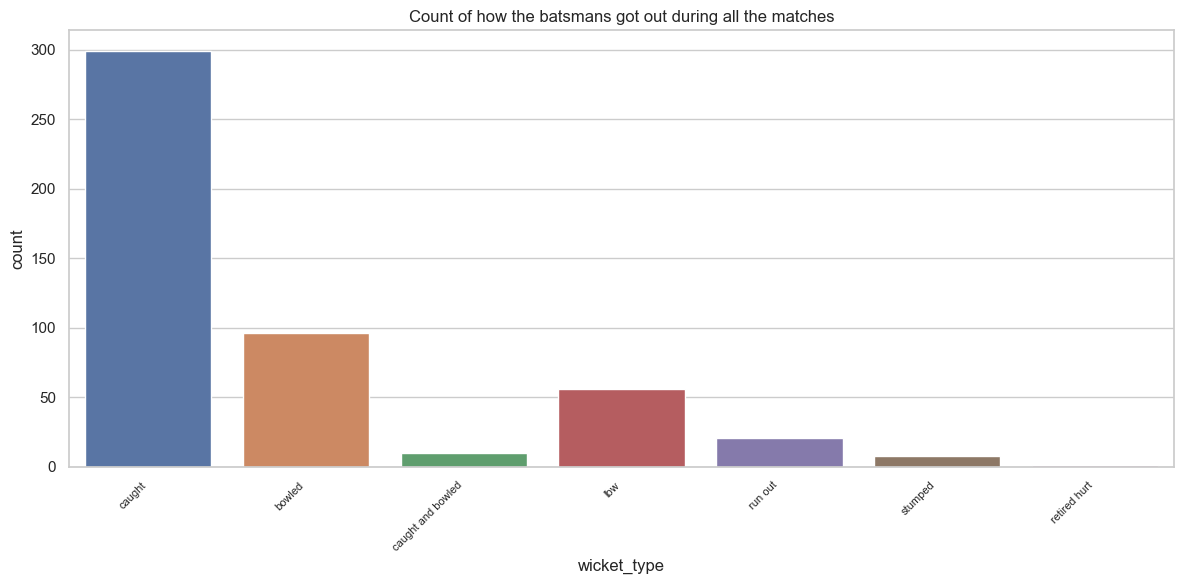

In [265]:
plt.figure(figsize=(12, 6))
sns.countplot(x='wicket_type', data=df_deliveries)
plt.title('Count of how the batsmans got out during all the matches')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

The plot illustrates that most of the players got out during the match due to getting catch out.

<Axes: xlabel='wicket_type', ylabel='count'>

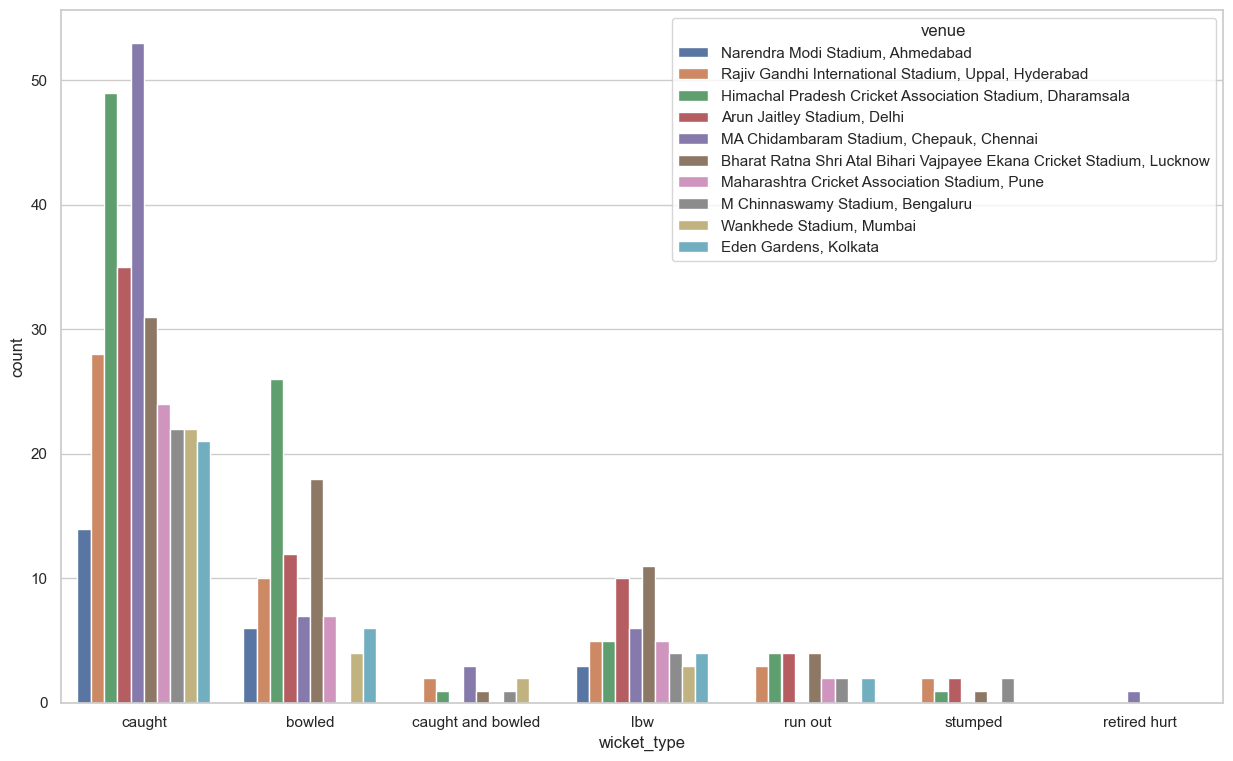

In [266]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 9))
sns.countplot(data=df_deliveries, x="wicket_type", hue="venue")

The resulting plot displays a visual representation of how many wickets of each type (like caught, bowled, lbw, etc.) have occurred in different venues. Each bar corresponds to a wicket type, and the height of the bar represents the count of wickets of that type. The bars are further divided into segments based on the venues, allowing you to see the distribution of each wicket type across various venues.

<Axes: xlabel='batting_team', ylabel='count'>

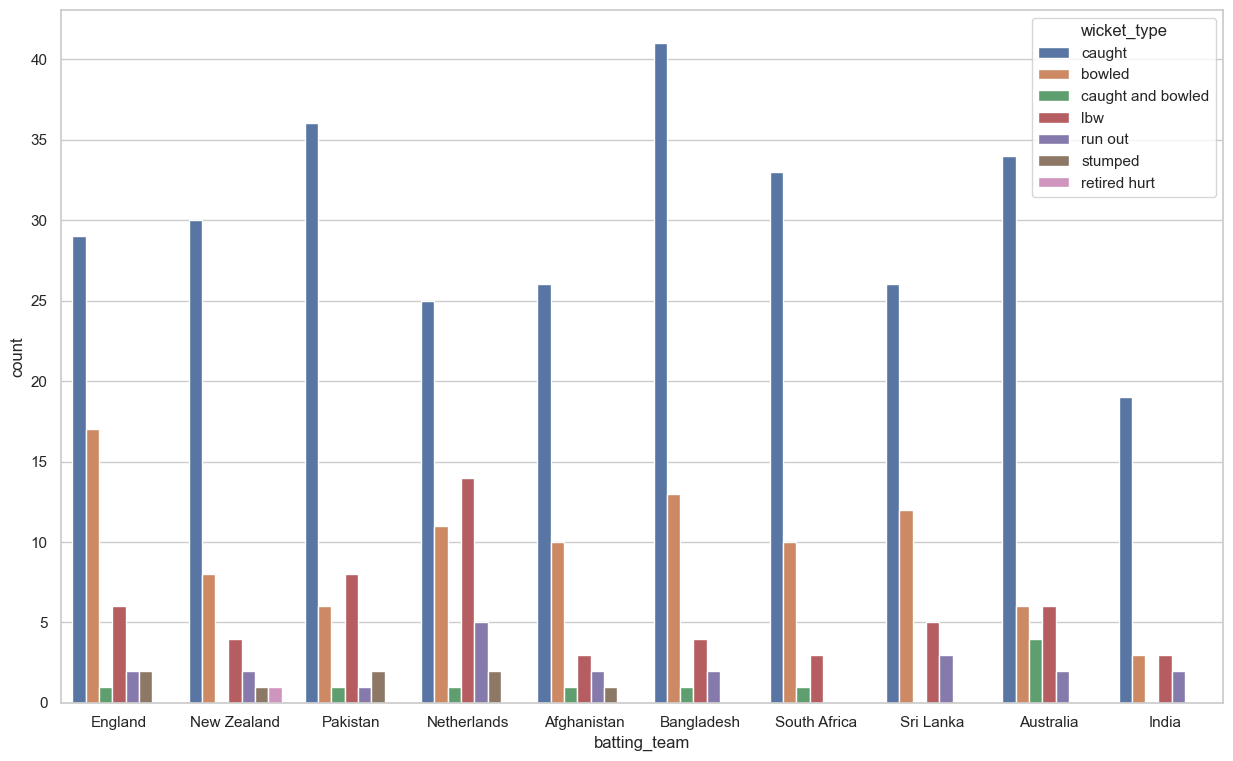

In [267]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 9))
sns.countplot(data=df_deliveries, x="batting_team", hue="wicket_type")

The resulting plot displays a visual representation of how many wickets of each type (like caught, bowled, lbw, etc.) have occurred for each batting team. Each bar corresponds to a batting team, and the height of the bar represents the count of wickets of that type. The bars are further differentiated by color, representing the distribution of each wicket type for each batting team.

## **Data Pre-Processing**

In [25]:
df_deliveries[['wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type','other_player_dismissed']] = df_deliveries[['wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type','other_player_dismissed']].fillna(0)

We have filled all the nulls or the blank values with 0.

In [26]:
df_deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [27]:
df_deliveries.isna().sum()

match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
dtype: int64

In [28]:
partnership_runs = 0
current_innings = None

def is_wicket(row):
    return row['wicket_type'] != 0

for index, row in df_deliveries.iterrows():
    # if innings has changed
    if row['innings'] != current_innings:
        current_innings = row['innings']
        partnership_runs = 0
        
    # if wicket has fallen
    if is_wicket(row):  
        df_deliveries.at[index, 'partnership_runs'] = partnership_runs
        partnership_runs = 0
        continue
    else:
        partnership_runs += row['runs_off_bat']
        
    df_deliveries.at[index, 'partnership_runs'] = partnership_runs


Here, we calculate the partnership runs for each delivery in a cricket match. The 'partnership_runs' represent the cumulative runs scored by the batting pair until a wicket falls or the innings change, at which point the count is reset.

In [29]:
df_deliveries.head(100)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,partnership_runs
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,6.0
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,7.0
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,8.0
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,15.4,England,New Zealand,JE Root,HC Brook,JDS Neesham,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,14.0
96,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,15.5,England,New Zealand,JE Root,HC Brook,JDS Neesham,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,15.0
97,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,15.6,England,New Zealand,HC Brook,JE Root,JDS Neesham,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,15.0
98,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,16.1,England,New Zealand,JE Root,HC Brook,R Ravindra,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,16.0


In [30]:
df_deliveries = df_deliveries[df_deliveries['wicket_type'] != 0]

This is done in order to filter the dataset and keep only the rows for finally calculated partnership runs which shows the runs made by a particular partnership of players until one of them gets out or the match ends.

In [31]:
df_deliveries.head(100)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,partnership_runs
47,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,7.4,England,New Zealand,DJ Malan,JM Bairstow,MJ Henry,0,0,0.0,0.0,0.0,0.0,0.0,caught,DJ Malan,0.0,0.0,38.0
78,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,12.5,England,New Zealand,JM Bairstow,JE Root,MJ Santner,0,0,0.0,0.0,0.0,0.0,0.0,caught,JM Bairstow,0.0,0.0,24.0
103,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,16.6,England,New Zealand,HC Brook,JE Root,R Ravindra,0,0,0.0,0.0,0.0,0.0,0.0,caught,HC Brook,0.0,0.0,30.0
130,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,21.2,England,New Zealand,MM Ali,JE Root,GD Phillips,0,0,0.0,0.0,0.0,0.0,0.0,bowled,MM Ali,0.0,0.0,23.0
202,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,33.2,England,New Zealand,JC Buttler,JE Root,MJ Henry,0,0,0.0,0.0,0.0,0.0,0.0,caught,JC Buttler,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,44.3,England,Bangladesh,HC Brook,SM Curran,Mahedi Hasan,0,0,0.0,0.0,0.0,0.0,0.0,caught,HC Brook,0.0,0.0,20.0
3542,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,46.4,England,Bangladesh,SM Curran,CR Woakes,Mahedi Hasan,0,0,0.0,0.0,0.0,0.0,0.0,caught,SM Curran,0.0,0.0,7.0
3553,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,48.3,England,Bangladesh,AU Rashid,CR Woakes,Mahedi Hasan,0,0,0.0,0.0,0.0,0.0,0.0,caught,AU Rashid,0.0,0.0,18.0
3558,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,49.2,England,Bangladesh,CR Woakes,MA Wood,Taskin Ahmed,0,0,0.0,0.0,0.0,0.0,0.0,caught,CR Woakes,0.0,0.0,10.0


Therefore, here we get the dataframe which consists of the runs made during the partnership.

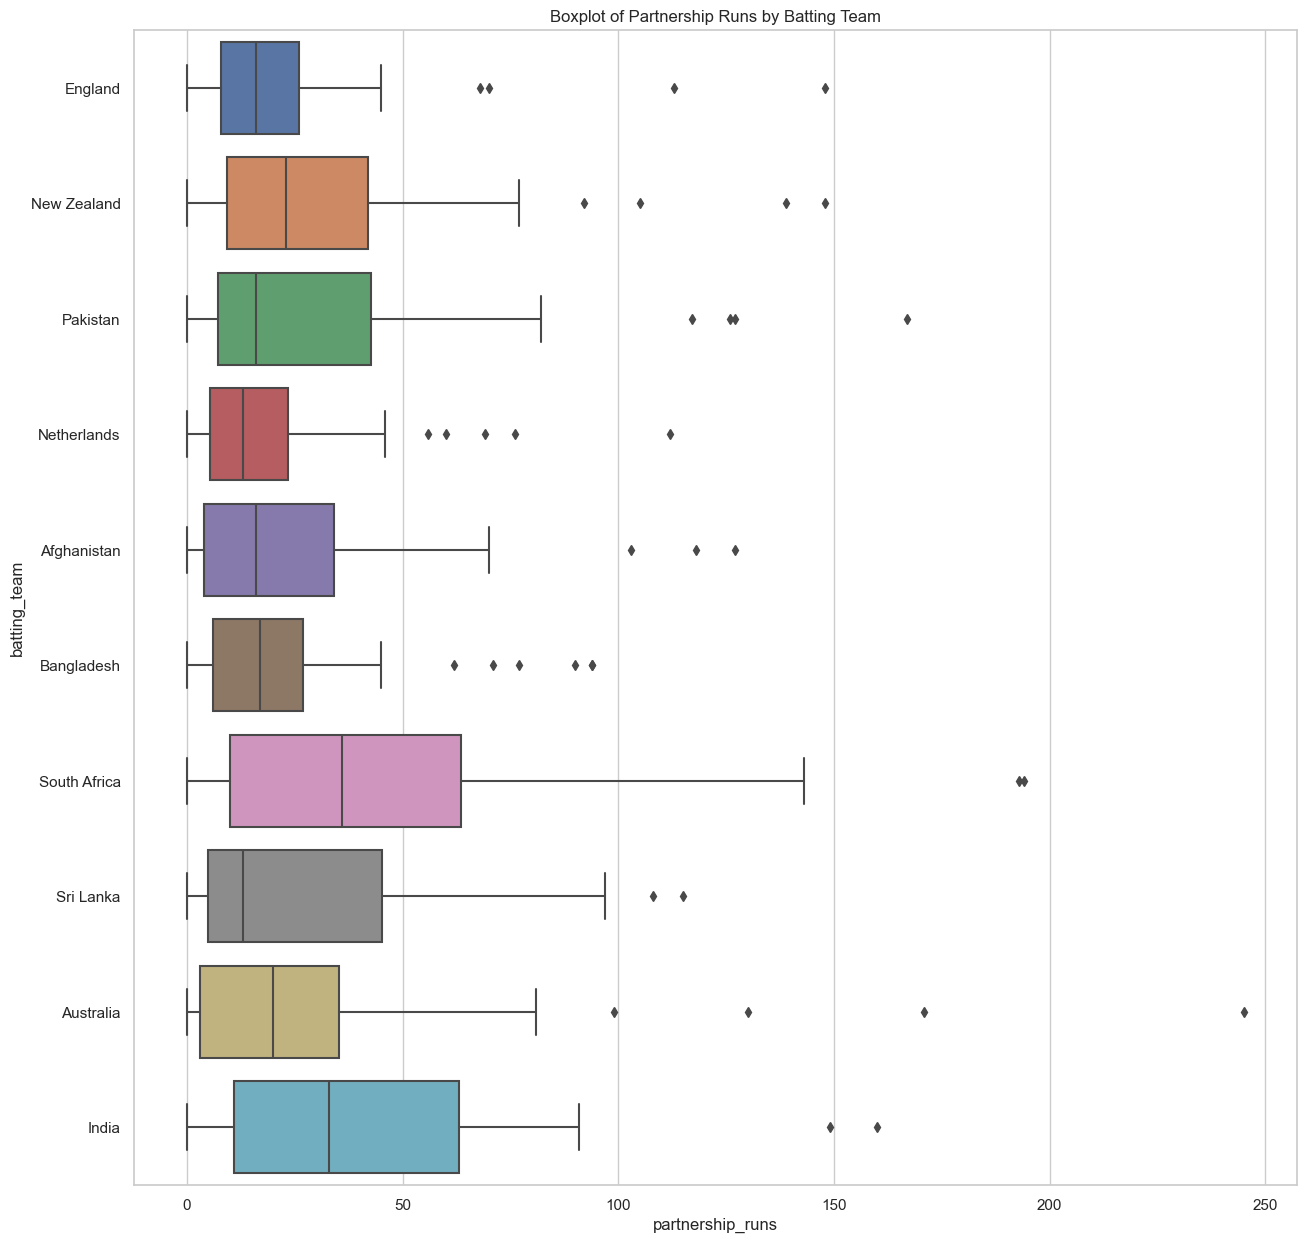

In [275]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='partnership_runs', y='batting_team', data=df_deliveries)
plt.title('Boxplot of Partnership Runs by Batting Team')
plt.show()

The boxplot of partnership runs by batting team provides a visual summary of the distribution of partnership runs for each batting team in the dataset. The height of the box and the position of the median provide information about the central tendency of the data for each batting team.

If one batting team has a box that is higher (indicating higher median) and longer (indicating larger IQR) than another team, it suggests that the partnership runs tend to be higher and more variable for the first team.

In [32]:
df_deliveries = df_deliveries.drop(['innings','season','start_date','batting_team', 'bowling_team', 'ball','runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty','other_wicket_type','other_player_dismissed','player_dismissed','match_id', 'wicket_type'],axis='columns')

In [33]:
df_deliveries.columns

Index(['venue', 'striker', 'non_striker', 'bowler', 'partnership_runs'], dtype='object')

In [34]:
cat = [col for col in df_deliveries if df_deliveries[col].dtype == 'object']
cat

['venue', 'striker', 'non_striker', 'bowler']

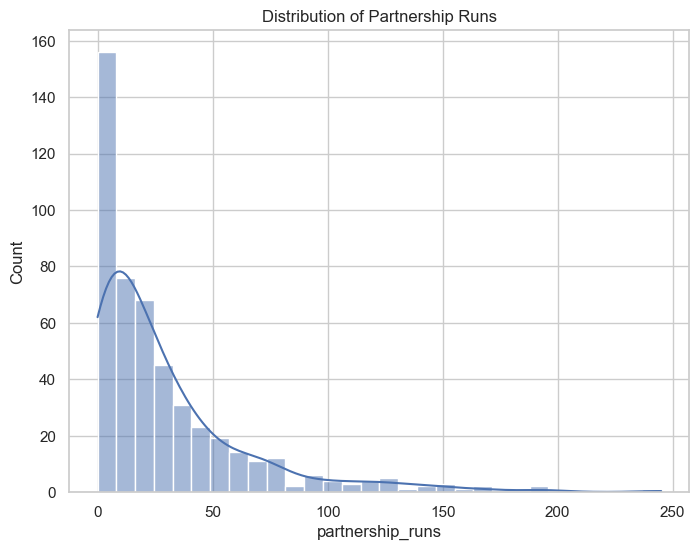

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df_deliveries['partnership_runs'], bins=30, kde=True)
plt.title('Distribution of Partnership Runs')
plt.show()


Each bar represents a range (bin) of partnership runs, and the height of the bar indicates the number of occurrences within that range. If the histogram has a single, well-defined peak around a certain value, it suggests that partnership runs often cluster around that value.

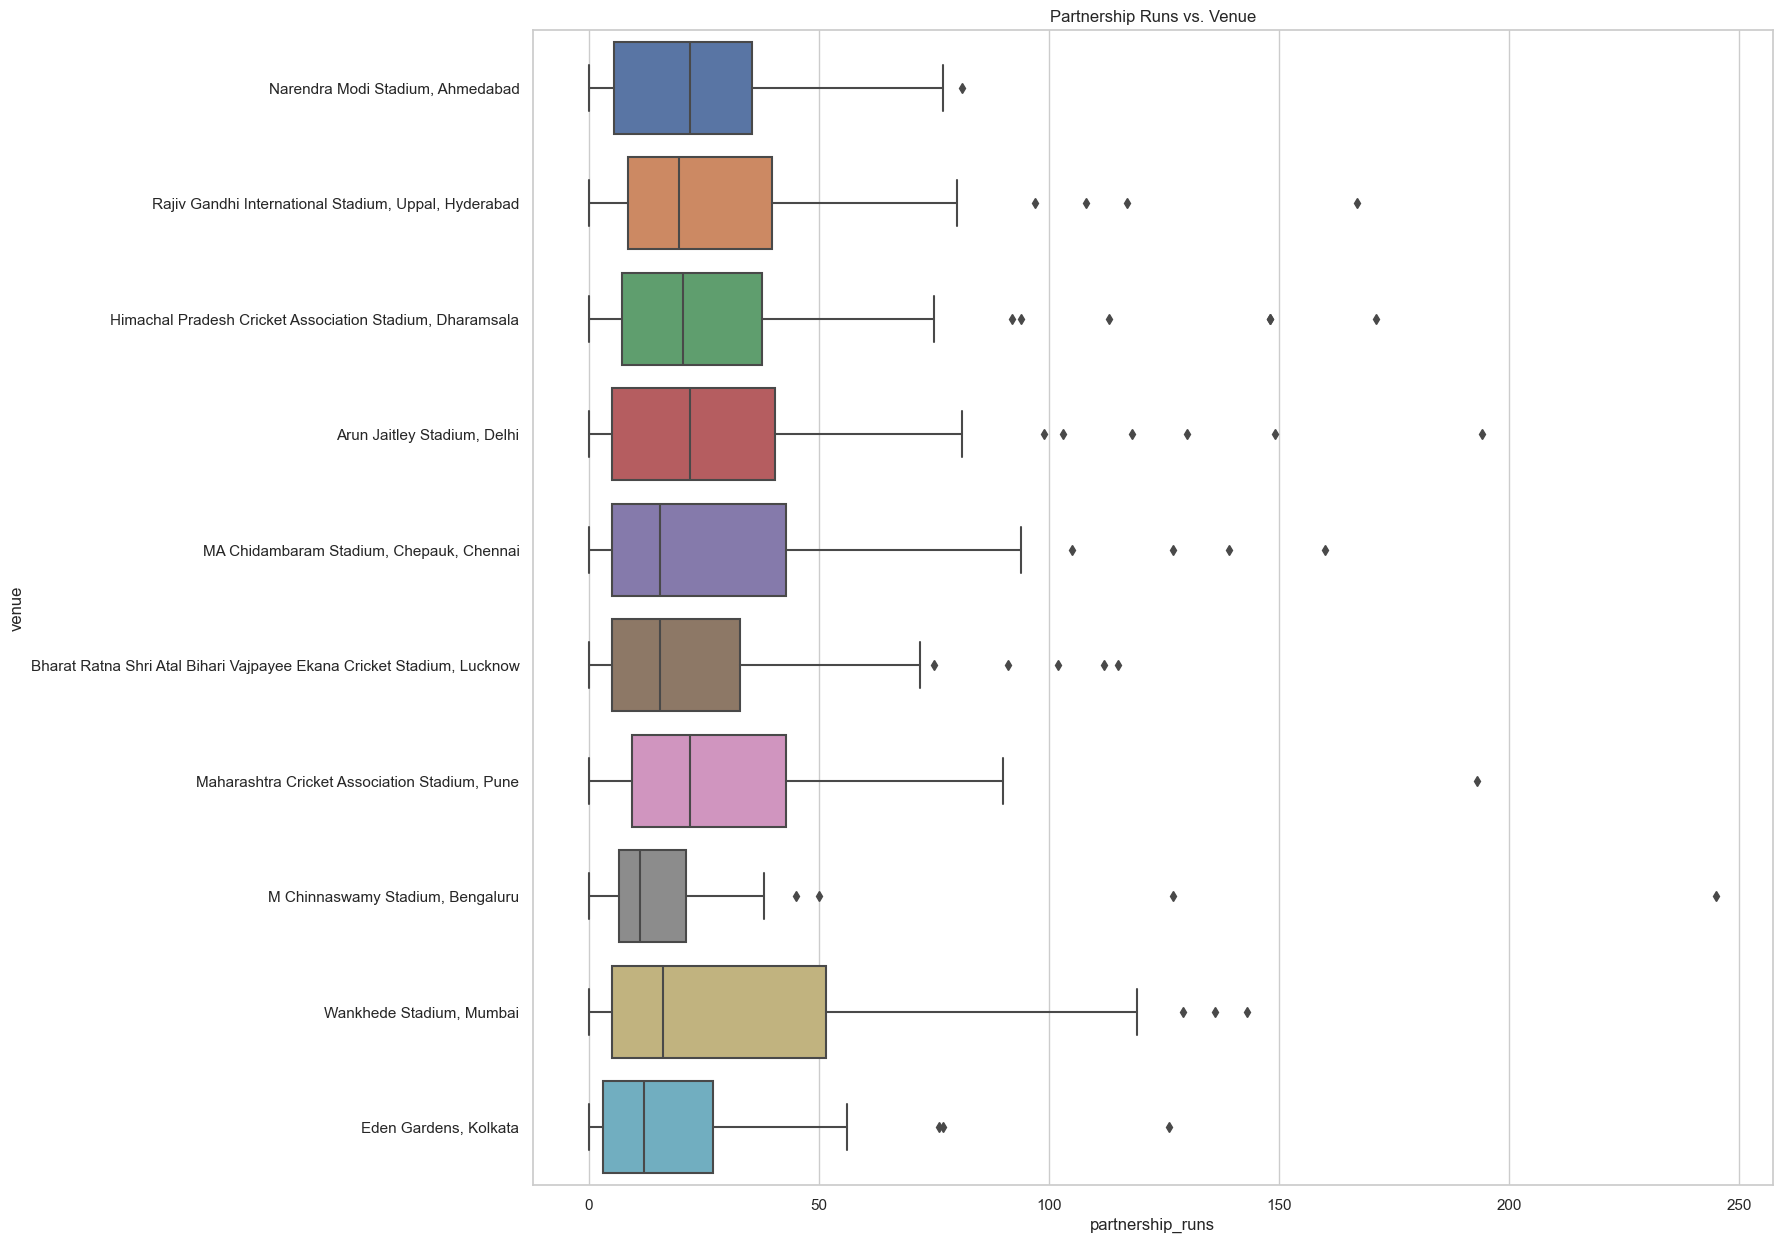

In [280]:
plt.figure(figsize=(16, 15))
sns.boxplot(x='partnership_runs', y='venue', data=df_deliveries)
plt.title('Partnership Runs vs. Venue')
plt.show()

The width of the boxes and the length of the whiskers give an idea of the variation in partnership runs for each venue. If a venue has a longer box and shorter whiskers, it suggests that partnership runs at that venue tend to be more consistent and less variable.

## **Data Transformations**

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Now, we will encode the categorical columns with numerical values using Label Encoder.

In [37]:
mapping = {}

for column in cat:
    df_deliveries[column] = le.fit_transform(df_deliveries[column])
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [38]:
for column_name in cat:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()


Mapping for column "venue":
Arun Jaitley Stadium, Delhi: 0
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow: 1
Eden Gardens, Kolkata: 2
Himachal Pradesh Cricket Association Stadium, Dharamsala: 3
M Chinnaswamy Stadium, Bengaluru: 4
MA Chidambaram Stadium, Chepauk, Chennai: 5
Maharashtra Cricket Association Stadium, Pune: 6
Narendra Modi Stadium, Ahmedabad: 7
Rajiv Gandhi International Stadium, Uppal, Hyderabad: 8
Wankhede Stadium, Mumbai: 9

Mapping for column "striker":
A Dutt: 0
A Zampa: 1
AAP Atkinson: 2
AD Mathews: 3
AK Markram: 4
AT Carey: 5
AT Nidamanuru: 6
AU Rashid: 7
Abdullah Shafique: 8
Azmatullah Omarzai: 9
BA Stokes: 10
BFW de Leede: 11
BKG Mendis: 12
Babar Azam: 13
C Green: 14
C Karunaratne: 15
CAK Rajitha: 16
CBRLS Kumara: 17
CN Ackermann: 18
CR Woakes: 19
D Madushanka: 20
DA Miller: 21
DA Warner: 22
DJ Malan: 23
DJ Mitchell: 24
DJ Willey: 25
DM de Silva: 26
DN Wellalage: 27
DP Conway: 28
FDM Karunaratne: 29
Fakhar Zaman: 30
Fazalhaq Farooqi: 31
G Coe

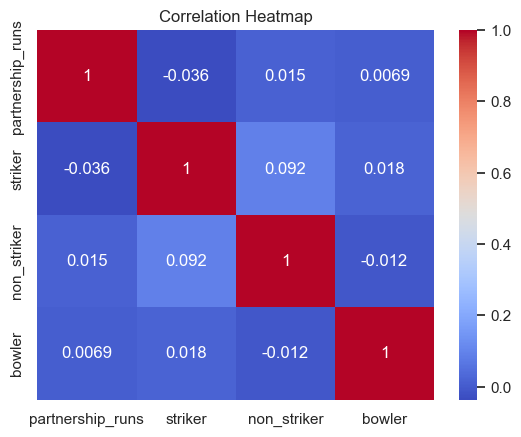

In [39]:
sns.heatmap(df_deliveries[['partnership_runs', 'striker', 'non_striker', 'bowler']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Here, we find a higher amount of negetive correlation among the selected features.

## **Model Training and Testing**

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from tensorflow import keras
import keras.layers as tfl
from keras.layers import BatchNormalization

In [41]:
X = df_deliveries[['venue', 'striker',
       'non_striker', 'bowler']]
y = df_deliveries['partnership_runs']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, shuffle=True)

In [51]:
# size_scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = size_scaler.transform(X_train)
# X_test_scaled = size_scaler.transform(X_test)
# X_train_scaled.shape, X_test_scaled.shape

In [52]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(),
                     "params": {'n_estimators': list(range(5, 100, 5)), 'max_depth': list(range(1, 40, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 50)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'PolynomialFeatures': {"model": make_pipeline(PolynomialFeatures(), LinearRegression()),
                      "params": {'polynomialfeatures__degree': [10,2,3,4,5,6,7,8,9]}},
    'CatBoostRegressor': {"model": CatBoostRegressor(iterations=100, learning_rate=0.01), "params": {}},
    'LGBMRegressor': {"model": lgb.LGBMRegressor(learning_rate=0.01), "params": {}}
}

In [53]:
model_results = pd.DataFrame()
model_results['Train_RMSE'] = None
model_results['Test_RMSE'] = None
model_results['Train_MAE'] = None
model_results['Test_MAE'] = None
model_results['best_params'] = None
best_test_score = math.inf

def eval_models_with_cv():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train, y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
        train_mae = mean_absolute_error(y_train, y_train_predicted)

        # Cross-validation
        cv_rmse = np.sqrt(-cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)).mean()
        cv_mae = -cross_val_score(best_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean()

        y_predicted = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
        test_mae = mean_absolute_error(y_test, y_predicted)
        
        print(model_name, test_mae, classifier.best_params_)

        if test_mae < best_test_score:
            best_test_score = test_mae
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

        model_results.loc[model_name, 'CV_RMSE'] = cv_rmse
        model_results.loc[model_name, 'CV_MAE'] = cv_mae

    y_predicted = best_reg_model_ours.predict(X_test)

    return model_results, best_reg_model_ours, best_test_score

In [54]:
model_results,best_reg_model_ours, best_test_score = eval_models_with_cv()

LinearRegression 24.90227588557047 {}


RandomForestRegressor 24.836876165043172 {'max_depth': 1, 'n_estimators': 60}


c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:52

XGBRegressor 24.75115962930628 {'learning_rate': 0.001, 'n_estimators': 10}
PolynomialFeatures 24.43850342427883 {'polynomialfeatures__degree': 2}
0:	learn: 35.6536269	total: 2ms	remaining: 198ms
1:	learn: 35.6273627	total: 3.4ms	remaining: 166ms
2:	learn: 35.5924438	total: 4.66ms	remaining: 151ms
3:	learn: 35.5693696	total: 5.91ms	remaining: 142ms
4:	learn: 35.5378724	total: 7.08ms	remaining: 135ms
5:	learn: 35.4996677	total: 8.21ms	remaining: 129ms
6:	learn: 35.4811892	total: 9.35ms	remaining: 124ms
7:	learn: 35.4375363	total: 10.6ms	remaining: 122ms
8:	learn: 35.4160287	total: 11.8ms	remaining: 119ms
9:	learn: 35.3936595	total: 12.9ms	remaining: 116ms
10:	learn: 35.3864918	total: 14.3ms	remaining: 115ms
11:	learn: 35.3632300	total: 15.5ms	remaining: 114ms
12:	learn: 35.3266196	total: 16.7ms	remaining: 112ms
13:	learn: 35.2870189	total: 17.9ms	remaining: 110ms
14:	learn: 35.2701150	total: 19.2ms	remaining: 109ms
15:	learn: 35.2466415	total: 20.4ms	remaining: 107ms
16:	learn: 35.23703

In [55]:
inputs=tfl.Input(shape=(4,))
x=tfl.Dense(512,activation='relu')(inputs)
x=BatchNormalization()(x)
x=tfl.Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(32,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(16,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(8,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(4,activation='relu')(x)
x=BatchNormalization()(x)
outputs=tfl.Dense(1,activation='linear')(x)
classifier_dnn=keras.Model(inputs,outputs)

classifier_dnn.compile(
    loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error']
)

classifier_dnn.fit(X_train, y_train,epochs=10)

y_test_pred = classifier_dnn.predict(X_test)

y_train_pred = classifier_dnn.predict(X_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)


if test_mae < best_test_score:
    best_test_score = test_mae
    best_reg_model_ours = 'Neural Network'
            
model_results.loc['Neural Network', ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE']] = [train_rmse, test_rmse, train_mae, test_mae]

Epoch 1/10
11/11 [==============================] - 4s 11ms/step - loss: 30.4980 - mean_absolute_error: 30.4980
Epoch 2/10
11/11 [==============================] - 0s 11ms/step - loss: 30.3977 - mean_absolute_error: 30.3977
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 30.3533 - mean_absolute_error: 30.3533
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 30.2906 - mean_absolute_error: 30.2906
Epoch 5/10
11/11 [==============================] - 0s 14ms/step - loss: 30.2755 - mean_absolute_error: 30.2755
Epoch 6/10
11/11 [==============================] - 0s 15ms/step - loss: 30.2077 - mean_absolute_error: 30.2077
Epoch 7/10
11/11 [==============================] - 0s 12ms/step - loss: 30.1626 - mean_absolute_error: 30.1626
Epoch 8/10
11/11 [==============================] - 0s 15ms/step - loss: 30.1213 - mean_absolute_error: 30.1213
Epoch 9/10
11/11 [==============================] - 0s 11ms/step - loss: 30.0888 - mean_absolute_error: 

In [56]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params,CV_RMSE,CV_MAE
LinearRegression,35.636509,33.827139,25.057791,24.902276,{},35.752063,25.301617
RandomForestRegressor,35.26369,33.727958,24.995894,24.836876,"{'max_depth': 1, 'n_estimators': 60}",35.603416,25.254398
XGBRegressor,35.573272,33.585375,25.117449,24.75116,"{'learning_rate': 0.001, 'n_estimators': 10}",35.481603,25.227232
PolynomialFeatures,35.258772,33.633567,24.776512,24.438503,{'polynomialfeatures__degree': 2},37.012673,26.375778
CatBoostRegressor,33.314439,33.701058,23.57391,24.618537,{},35.732465,25.266992
LGBMRegressor,33.151541,33.655084,23.284278,24.328954,{},36.125706,25.484052
Neural Network,46.649574,42.391605,30.020924,26.190815,NaN,NaN,NaN


In [57]:
print(best_reg_model_ours)

LGBMRegressor(learning_rate=0.01)


In [58]:
y_predicted = best_reg_model_ours.predict(X_test)

In [59]:
classifier=best_reg_model_ours
classifier.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 343, number of used features: 4
[LightGBM] [Info] Start training from score 30.399417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(learning_rate=0.01)

In [60]:
import pickle
pickle_out = open("../pickle_files/run_partnership.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()